In [37]:
import pandas
# EDA=Exloratory Data Analysis
data=pandas.read_csv("datasets/supermarket_data.csv")
data

,Invoice ID,city,customertype,gender,product,itemprice,quantity,total,date,time,payment,customersalary,rating
0,750-67-8428,Nairobi,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,MPESA,26.1415,9.1
1,226-31-3081,Nakuru,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6
2,631-41-3108,Nairobi,Normal,Female,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4
3,123-19-1176,Nairobi,Member,Female,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,MPESA,23.2880,8.4
4,373-73-7910,Nairobi,Normal,Female,Health and beauty,86.31,7,634.3785,2/8/2019,10:37,MPESA,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,233-67-5758,Nakuru,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,MPESA,2.0175,6.2
997,303-96-2227,Mombasa,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,MPESA,48.6900,4.4
998,727-02-1313,Nairobi,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,1.5920,7.7
999,347-56-2442,Nairobi,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,3.2910,4.1


In [38]:
data.describe()

,itemprice,quantity,total,customersalary,rating
count,998.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,55.686523,5.505495,322.739927,15.368568,6.972527
std,26.538665,2.925444,245.867115,11.707958,1.717729
min,10.080000,1.000000,10.678500,0.508500,4.000000
25%,32.825000,3.000000,122.524500,5.834500,5.500000
50%,55.230000,5.000000,253.680000,12.080000,7.000000
75%,78.040000,8.000000,471.030000,22.430000,8.500000
max,99.960000,10.000000,1042.650000,49.650000,10.000000


In [39]:
# print out the column city
data["city"]

0       Nairobi
1        Nakuru
2       Nairobi
3       Nairobi
4       Nairobi
         ...   
996      Nakuru
997     Mombasa
998     Nairobi
999     Nairobi
1000    Nairobi
Name: city, Length: 1001, dtype: object

In [40]:
# check some propotions based on some given numbers 
data .groupby("product").size()


product
Electronic accessories    241
Fashion accessories       189
Food and beverages        149
Health and beauty         186
Home and lifestyle        188
Sports and travel          42
dtype: int64

In [41]:

data.groupby(["gender","payment"]).size()

gender  payment    
Female  Cash           159
        Credit card    171
        MPESA          295
Male    Cash           116
        Credit card     84
        MPESA          176
dtype: int64

In [42]:
data.groupby(["gender","city","payment","product"]).size()


gender  city     payment  product               
Female  Mombasa  Cash     Electronic accessories    15
                          Fashion accessories       10
                          Food and beverages         2
                          Health and beauty          6
                          Home and lifestyle         6
                                                    ..
Male    Nakuru   MPESA    Electronic accessories    12
                          Fashion accessories       14
                          Food and beverages        10
                          Health and beauty          9
                          Home and lifestyle         8
Length: 105, dtype: int64

<AxesSubplot: ylabel='count'>

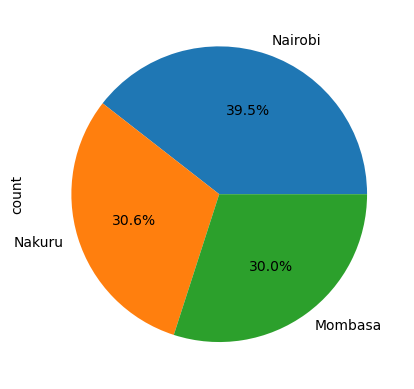

In [43]:
# visualize your output in form of a pie chart 
data["city"].value_counts().plot.pie(autopct="%1.1f%%")

In [44]:
data.groupby(["city","gender"]).size()

city     gender
Mombasa  Female    192
         Male      108
Nairobi  Female    230
         Male      165
Nakuru   Female    203
         Male      103
dtype: int64

Text(0, 0.5, 'Distribution Count')

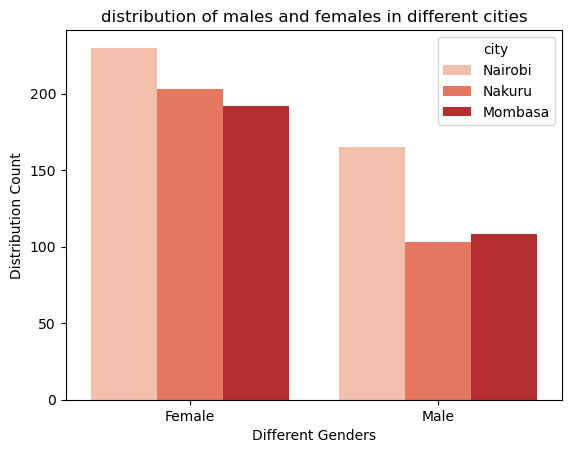

In [45]:
# plottking graphs based on the data you have
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="gender", data=data,palette="Reds",hue="city")
plt.title("distribution of males and females in different cities")
plt.xlabel("Different Genders")
plt.ylabel("Distribution Count")

Text(0.5, 1.0, 'Total Distribution of Gender against Total purchase')

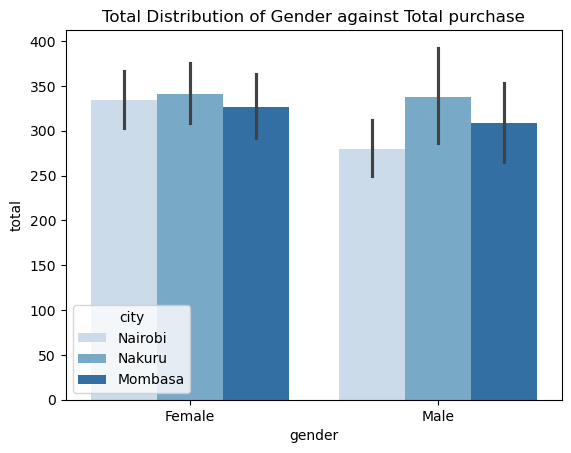

In [50]:
# below is a barplot
# a barplot is a bivarirate/multiple meaning it execpts you to pass more than one column
sns.barplot(x="gender",y="total",data=data,palette="Blues",hue="city")
plt.title ("Total Distribution of Gender against Total purchase")

<AxesSubplot: xlabel='gender', ylabel='total'>

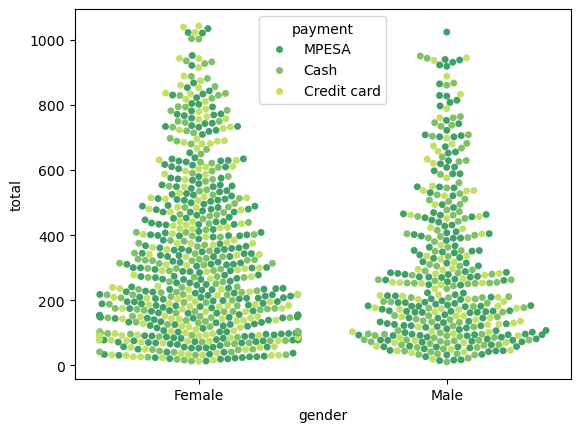

In [52]:
# below is a swarmPlot
sns.swarmplot(x="gender",y="total",data=data,palette="summer",hue="payment")

<AxesSubplot: xlabel='rating', ylabel='total'>

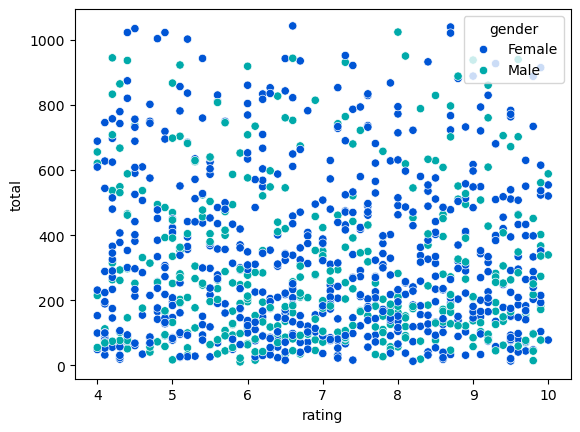

In [53]:
# Below is a scatterPlot which is an opposite of swarmplot.    in that it does not catergorise entities
sns.scatterplot(x="rating",y="total",data=data,palette="winter",hue="gender")

<AxesSubplot: xlabel='date', ylabel='total'>

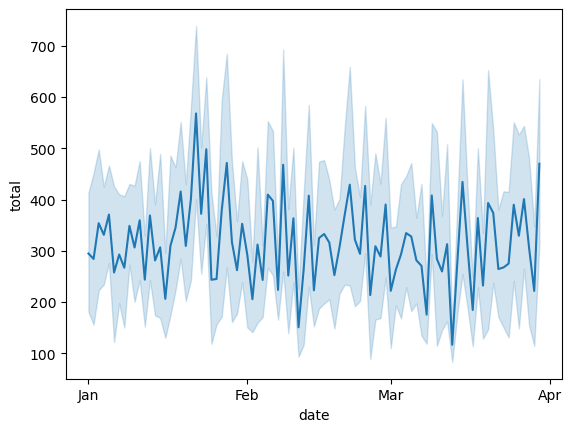

In [56]:
# Below is a line graph
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# create the graph
sns.lineplot(x="date",y="total",data=data)